# **Classificador profund d'imatges de castells**

### **Author:** Pol Reviejo, Statistician & Data Scientist

### **Date:** 01/08/2025

**[EN]** In Catalonia, castells are a centuries-old tradition consisting of the construction of human towers formed by people climbing on top of each other, dressed in shirts and white trousers. There are many types of castells, but in this project, we will focus on three: the pilar de 5 (pd5), the torre de 7 (2d7), and the quatre de 8 (4d8).
This project presents a convolutional neural network model capable of identifying a castell from an image, allowing it to recognize and distinguish between the three aforementioned types. The framework used is TensorFlow.

**[CAT]** A Catalunya existeixen els castells, una tradició centenària que consisteix en la construcció de torres humanes formades per persones que pugen unes damunt les altres, vestides amb camisa i pantalons blancs. Hi ha moltes varietats de castells, però en aquest projecte ens centrarem en tres: el pilar de 5 (pd5), la torre de 7 (2d7) i el quatre de 8 (4d8).
En aquest projecte es desenvolupa un model de xarxa neuronal convolucional capaç d’identificar un castell a partir d’una imatge, de manera que pugui reconèixer i diferenciar els tres castells esmentats. El framework utilitzat és TensorFlow.

_______________________________________

Llibreries utilitzades pel projecte:

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


_________________________________________________________________________________________

## 01. Funció per crear dataset d'imatges

Es crea una funció per crear un dataset d'imatges, on es retorna:

```X```: Imatge castell amb 128x128 pixels, 3 canals de color\
```Y```: Tipus de castell

Es va a la ruta d'imatges del castell indicat i es crea llista d'imatges, fent que totes tinguin 128x128 pixels amb els seus respectius 3 canals de color.

In [ ]:
# (Connect to Drive)

In [ ]:
def crear_dades(ruta,castell):
  # situar al directori i noms d'arxius imatges
  os.chdir(ruta)
  fitxers = os.listdir()

  # Llista amb imatges
  imatges = []

  # importar cada png i afegir a la llista d'imatges
  for fitxer in fitxers:
      if fitxer.lower().endswith(('.png', '.jpg', '.jpeg')):
          img = cv2.imread(os.path.join(ruta, fitxer))
          imatges.append( cv2.resize(img, (128, 128)) )

  X = np.array(imatges)
  Y = np.array( [castell]*len(imatges) )

  return(X,Y)


In [ ]:
# (Load Images)

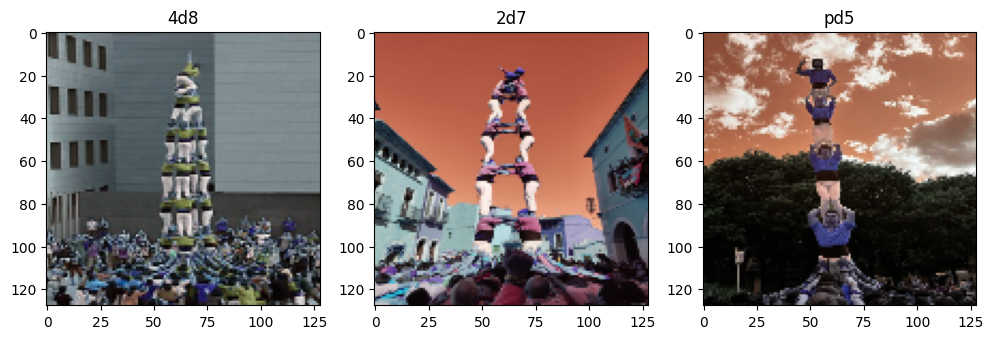

In [ ]:
# Crear gràfics un al costat de l'altre
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
# Imatge 4d8
axes[0].imshow(X0[2])
axes[0].set_title('4d8')
# Imatge 2d7
axes[1].imshow(X1[2])
axes[1].set_title('2d7')
# Imatge pd5
axes[2].imshow(X2[2])
axes[2].set_title('pd5')

plt.show()

Ajunto els conjunts d'imatges del 4d8, 2d7, pd5 i l'etiqueta de l'imatge ```[4d8,2d7,pd5]```

In [ ]:
# Ajuntar X0 i X1 (imatges)
X = np.concatenate((X0, X1, X2), axis=0)
# Ajuntar Y0 i Y1 (etiquetes)
Y = np.concatenate((Y0, Y1, Y2), axis=0)

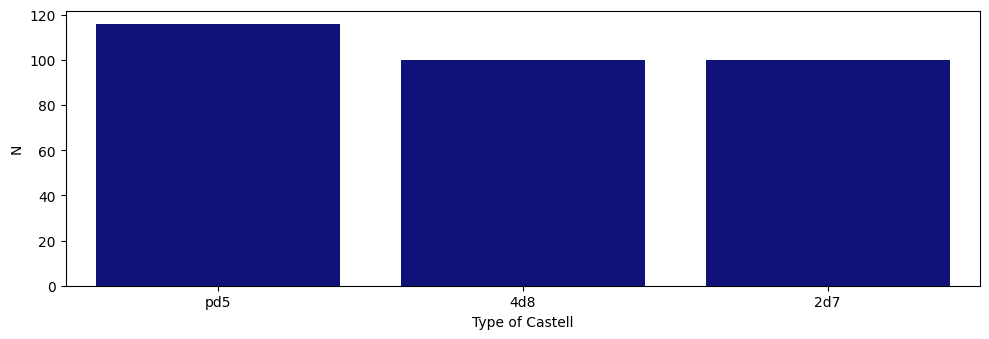

In [ ]:
df_Y = pd.DataFrame(Y, columns=['Value'])
value_counts = df_Y['Value'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']
# Plot
plt.figure(figsize=(10,3.5))
sns.barplot(x='Value', y='Count', data=value_counts, color='darkblue')
plt.ylabel('N')
plt.xlabel('Type of Castell')
plt.tight_layout()
plt.show()

Preparo la variable resposta en format One Hot Encoding com un vector amb 1/0 per poder entrenar el model

In [ ]:
le = LabelEncoder()
Y_int = le.fit_transform(Y)
# Segon pas: passar a one-hot
Y_onehot = to_categorical(Y_int)

Faig una partició train i test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_onehot, test_size=0.2, random_state=42)

In [ ]:
print("Images at the train dataset:",X_train.shape)
print("Images at the test dataset:",X_test.shape)

Images at the train dataset: (252, 128, 128, 3)
Images at the test dataset: (64, 128, 128, 3)


_________________________________________________________________________________

## 02. CNN per classsificar castells

Defineixo una xarxa neuronal convolucional amb 4 capes que aplica convolucions i max-poolings. L'última capa de sortida consisteix en una regressió softmax (3 categories: ```pd5```, ```2d7```, ```4d8```) amb 256 neurones.

In [ ]:
# Model CNN bàsic
model = models.Sequential([
    # 1a capa
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    # 2a capa
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 3a capa
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 4a capa
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # 5a capa
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Output layer
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')  # (k tipus castells) classes → softmax
])

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,859 (1.56 MB)

 Trainable params: 409,859 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

None


Mètode per entrenar el model.

In [ ]:
# Compilar
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # one-hot encoding → categorical_crossentropy
              metrics=['accuracy'])

S'estima el model.

```early_stop```: Quan es veu que la performance a test empitjora s'atura l'entrenament.

```epochs```: Numero iteracions de la backpropagation.

```batch_size```: Dintre d'una backpropagation es fan $n=$ ```batch_size``` subconjunts d'entrenament de la mostra. Si ```batch_size=1``` una backprop es fa amb $n_{train}$ iteracions. Es fa servir quan tens poques dades...

In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=X_train.shape[0],
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3810 - loss: 13.8735 - val_accuracy: 0.3438 - val_loss: 42.8684
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3095 - loss: 46.4263 - val_accuracy: 0.3281 - val_loss: 34.2080
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3135 - loss: 34.2646 - val_accuracy: 0.3125 - val_loss: 10.5898
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3571 - loss: 9.7856 - val_accuracy: 0.3281 - val_loss: 3.9937
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.3373 - loss: 3.6915 - val_accuracy: 0.3594 - val_loss: 2.6362
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3214 - loss: 2.7738 - val_accuracy: 0.3594 - val_loss: 1.5533
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3254 - loss: 1.5782 - val_accuracy: 0.3281 - val_loss: 1.9620
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3770 - loss: 1.8743 - val_accuracy: 0.3906 - val_loss: 1.9160
Ep

Predic amb el model al conjunt test:

In [ ]:
y_probs = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step


Visualitzo algunes imatges del conjunt test amb el valor real, valor predit i la probabilitat del model.

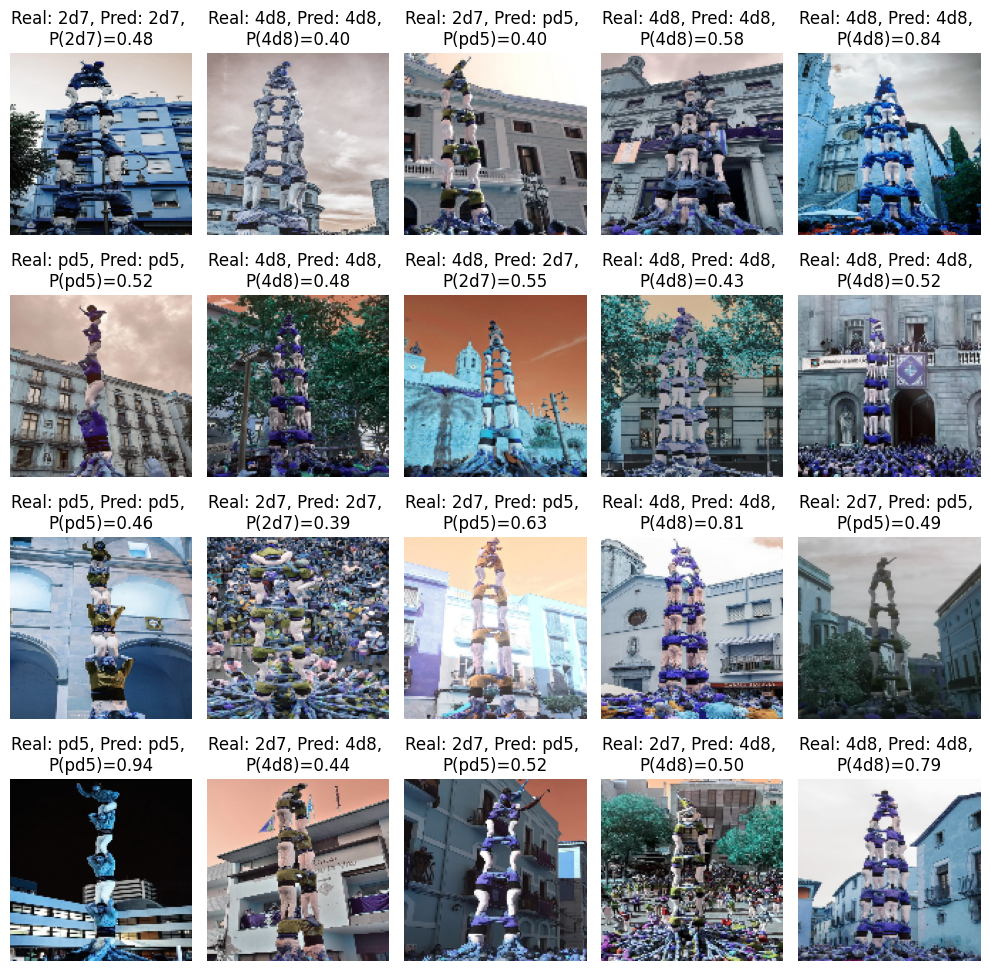

In [ ]:
# Redondejar les probabilitats a 2 decimals
probs_rounded = np.round(y_probs, 2)

# Obtenir les etiquetes reals i predictes
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_probs, axis=1)

# Diccionari per a les etiquetes
label_map = {0: "2d7", 1: "4d8", 2: "pd5"}

# Graficar les primeres 20 imatges en 4 files i 5 columnes
plt.figure(figsize=(10, 10))  # Augmentem la mida de la figura per ajustar les 20 imatges

for i in range(20):
    plt.subplot(4, 5, i+1)  # 4 files i 5 columnes
    plt.imshow(X_test[i].astype("uint8"))
    plt.axis('off')

    # Extraure la probabilitat i les etiquetes
    real_label = label_map[y_test_class[i]]
    predicted_label = label_map[y_pred_class[i]]
    prob = probs_rounded[i][y_pred_class[i]]

    # Títol amb classe real, classe predicha i probabilitat (2 decimals)
    title = f"Real: {real_label}, Pred: {predicted_label}, \nP({predicted_label})={prob:.2f}"

    plt.title(title)

plt.tight_layout()
plt.show()


Matriu de confusió on es pot veure el castell real de l'imatge (eix vertical) i el castell predit pel model (eix vertical).

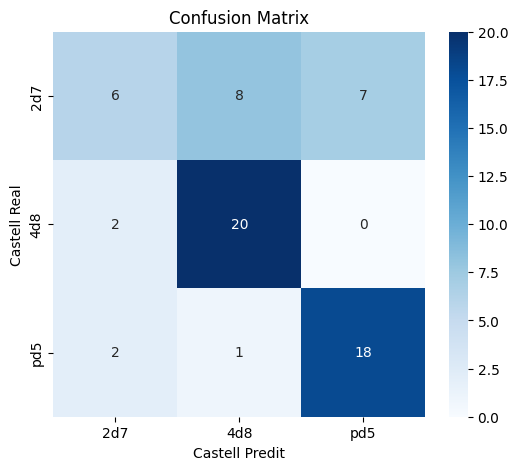

In [ ]:
# Generar la confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Mostrar la confusion matrix amb heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["2d7", "4d8","pd5"], yticklabels=["2d7", "4d8","pd5"])
plt.title("Confusion Matrix")
plt.xlabel("Castell Predit")
plt.ylabel("Castell Real")
plt.show()

Es mostra la capacitat predictiva del model. Les mètriques amb la capacitat predictiva del model:

In [ ]:
print( classification_report(y_test_class, y_pred_class) )

              precision    recall  f1-score   support

           0       0.60      0.29      0.39        21
           1       0.69      0.91      0.78        22
           2       0.72      0.86      0.78        21

    accuracy                           0.69        64
   macro avg       0.67      0.68      0.65        64
weighted avg       0.67      0.69      0.65        64



__________________________________________________________________________________________________________

## 03. Interpretació d'una CNN

Una CNN (Convolutional Neural Network) és un model matemàtic que pren com a input l'imatge del castell i va aplicant diverses transformacions (convolucions) fins a acabar projectant l'imatge en un espai $\mathbb{R}^n$ dimensional linealment separable, en què un model estadístic simple (una regressió softmax) dóna bons resultats per predir.

Cada capa de la xarxa neuronal fa *"feature extraction"*, és a dir identifica els patrons de l'imatge rellevants que serveix per predir si és un castell o un altre. La primera capa, sol ocupar-se de identificar les vores de l'imatge que es vol predir, és a dir identificar on és la figura a l'imatge. Altres capes es poden ocupar de comptar el número de pisos i amplada del castell.

Replico capa a capa del model entrenat, per poder anar generant outputs de cada capa:

In [ ]:
from tensorflow.keras import Input

inputs = Input(shape=(128, 128, 3))
# 1st layer
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
# 2nd layer
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 3rd layer
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 4rth layer
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# Output layer
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(3, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=outputs)

Obtinc un model que predigui l'output de cada sortida de la capa.

In [ ]:
# Extreu les sortides de les capes convolucionals
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Crea un model que doni com a sortida aquestes activacions
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


Triaré aquesta imatge d'exemple.

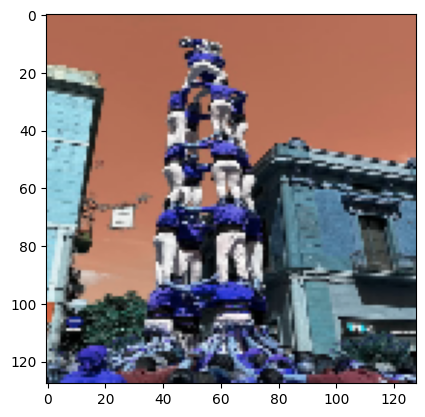

In [ ]:
X_example, Y_example = crear_dades('/content/drive/My Drive/ComputerVision Castells/Images/zz - Castells exemples','dummy')

imatge_exemple = X_example[1]
plt.imshow(imatge_exemple)

Obtinc per a aquesta imatge com es veu per cada hidden layer de la CNN.

In [ ]:
# Agafem la imatge 0 del test i li posem la dimensió de batch (1, 128, 128, 3)
img = np.expand_dims(imatge_exemple, axis=0)

# Obtenim les activacions (sortides de cada capa convolucional)
activations = activation_model.predict(img)

layer1_activation = activations[0]  # activació de la primera capa conv
layer2_activation = activations[1]  # activació de la segona capa conv
layer3_activation = activations[2]  # activació de la tercera capa conv
layer4_activation = activations[3]  # activació de la quarta capa conv

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


Creo una funció que mostri els 9 primers filtres de l'imatge de cada hidden layer del model.

In [ ]:
def mostrar_activacions(activacio, titol=None):
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    for i in range(9):
        ax = axes[i // 3, i % 3]
        ax.imshow(activacio[0, :, :, i], cmap='viridis')
        ax.axis('off')
    if titol:
        fig.suptitle(titol, fontsize=14)
    plt.tight_layout()
    plt.show()

1. Output de la primera capa de la CNN:

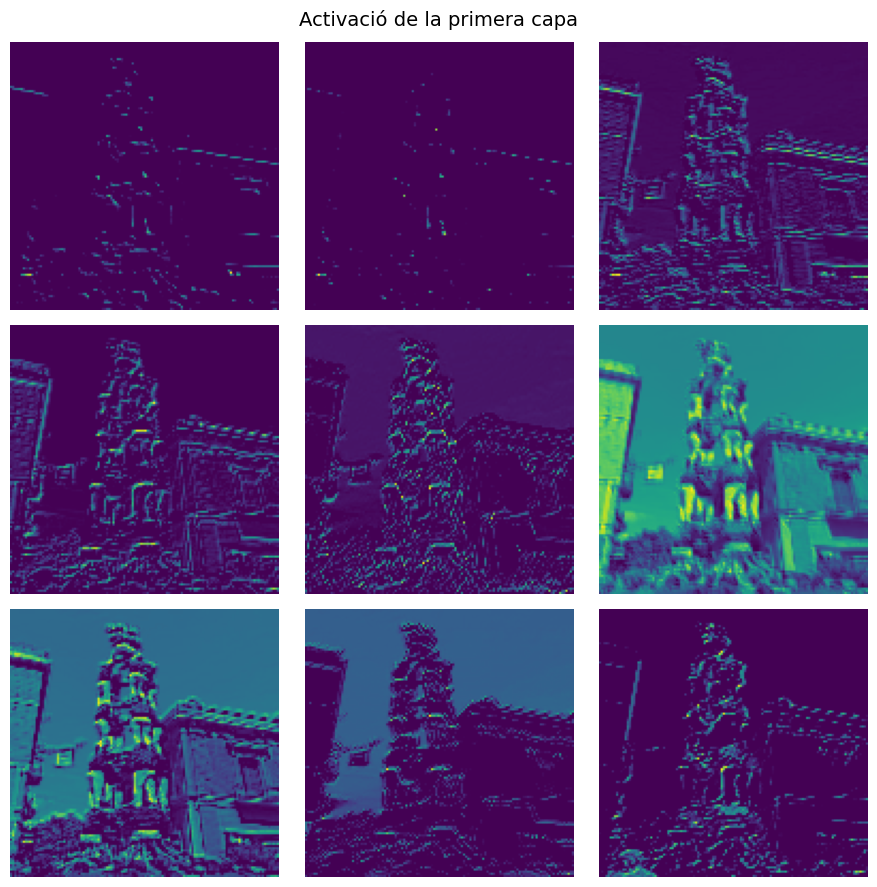

In [ ]:
mostrar_activacions(layer1_activation, titol='Activació de la primera capa')

2. Output de la segona capa de la CNN:

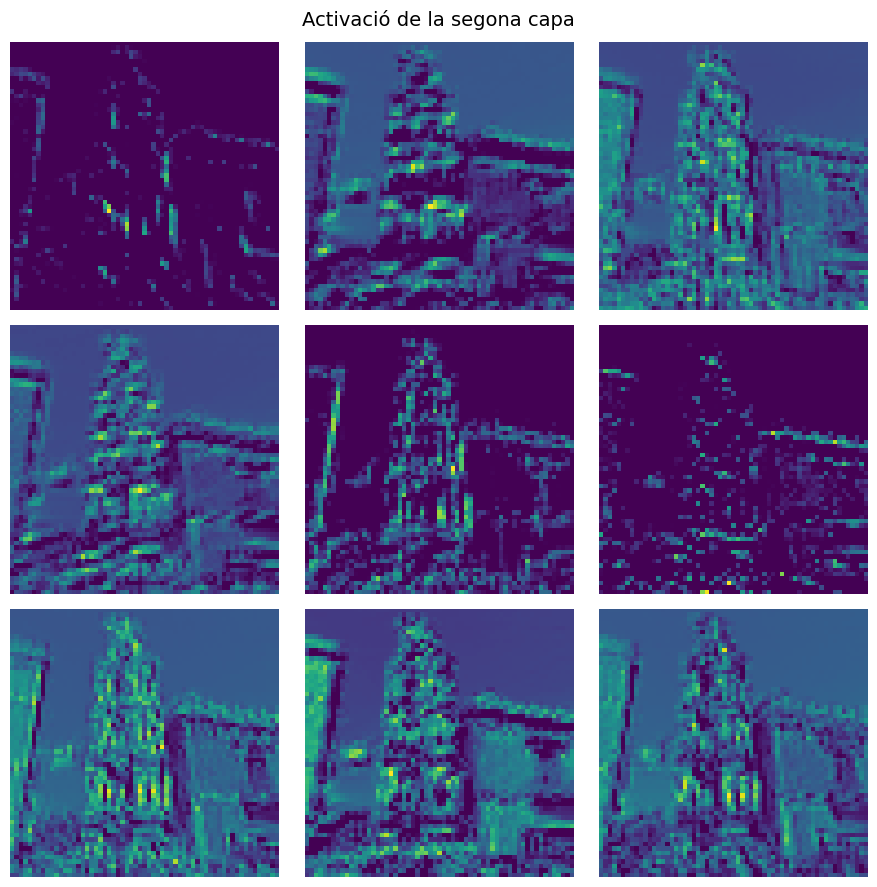

In [ ]:
mostrar_activacions(layer2_activation, titol='Activació de la segona capa')

3. Output de la tercera capa de la CNN:

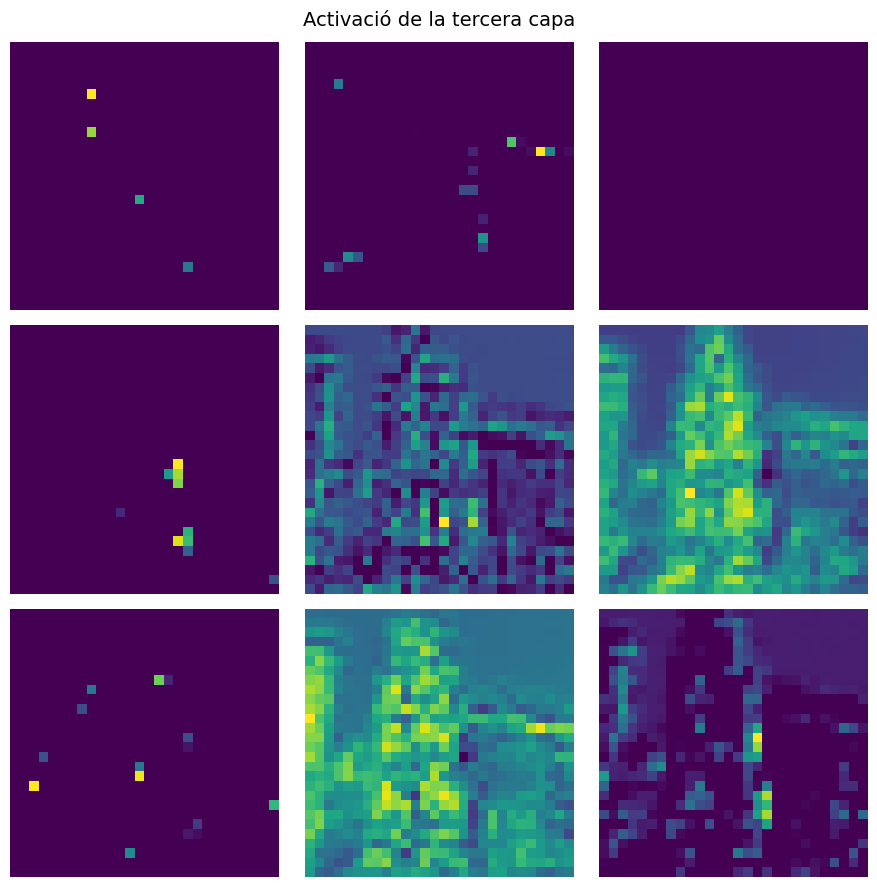

In [ ]:
mostrar_activacions(layer3_activation, titol='Activació de la tercera capa')